# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

# Importing the titanic dataset

In [ ]:
#Read the dataset
df=pd.read_csv('titanic.csv')

# Some basic commands

In [ ]:
# Get the top 5 Records
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [ ]:
# Get the bottom 5 Records
df.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Get the number of rows & Columns
df.shape

(891, 12)

In [ ]:
# Get more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Get the list of columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Get the Statistical Information about the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Display summary statistics
print(df.describe(include='all'))


        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

# 1) Identify and Handle Missing Values

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values

# Fill missing Age with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Check for Null Values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# 2) Check for Duplicates and Handle Them

In [ ]:
# Check for Duplicate Values
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [ ]:
# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Drop duplicates
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [ ]:
# Remove Duplicate Values
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(891, 12)

# 3) Identify Outliers and Handle Them

In [ ]:
# Identify outliers using IQR for 'Fare'
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = (df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR))

# Remove outliers
df = df[~outliers]

# Confirm removal
print(df['Fare'].describe())


count    775.000000
mean      17.822091
std       13.578085
min        0.000000
25%        7.895800
50%       13.000000
75%       26.000000
max       65.000000
Name: Fare, dtype: float64


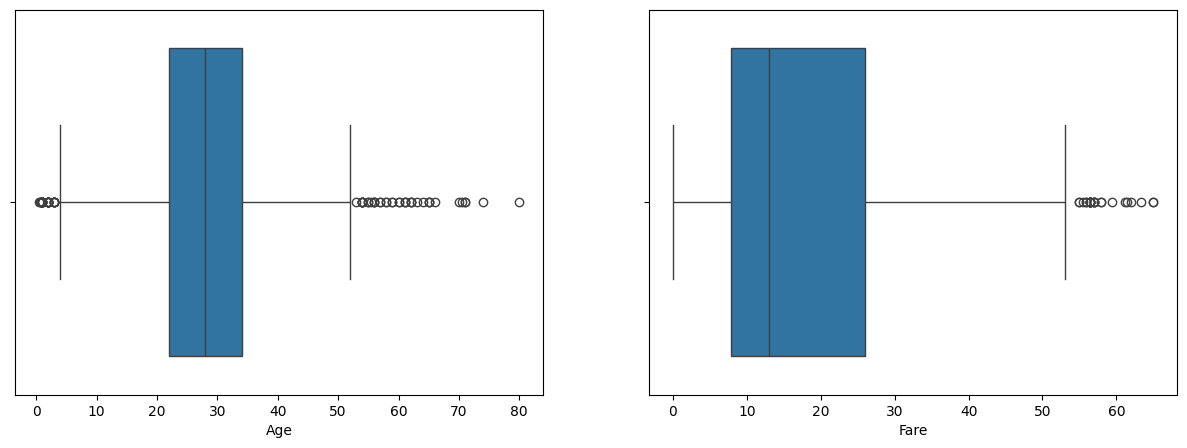

In [ ]:
# Step 3: Identify Outliers & Handle Them
# Identify outliers using boxplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=df['Age'], ax=axs[0])
sns.boxplot(x=df['Fare'], ax=axs[1])
plt.show()

In [ ]:
# Cap outliers in 'Age' and 'Fare' at the 99th percentile
df['Age'] = df['Age'].apply(lambda x: min(x, df['Age'].quantile(0.99)))
df['Fare'] =df['Fare'].apply(lambda x: min(x, df['Fare'].quantile(0.99)))


<Axes: >

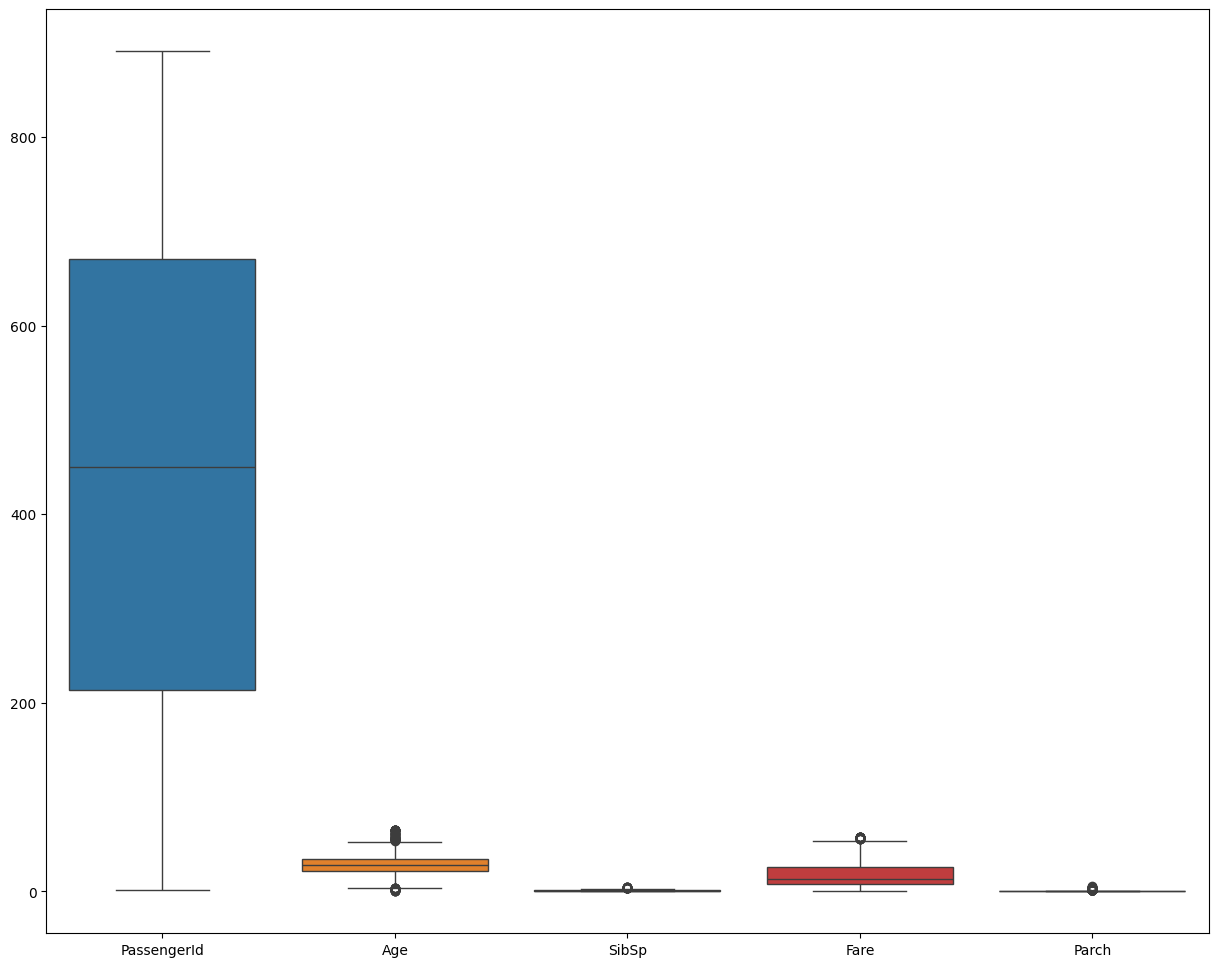

In [ ]:
# Checking for the presence of outliers in numeric cols ('age','trtbps','chol','thalachh','oldpeak')
plt.figure(figsize=(15,12)) # Set the Width & Height
# df.boxplot(column=['PassengerId','Age','SibSp','Fare','Parch'])
sns.boxplot(data=df[['PassengerId','Age','SibSp','Fare','Parch']])

In [ ]:
def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1

    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    #print("The lower & Upper Bound",lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list
for i in ['PassengerId','Age','SibSp','Fare','Parch']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in PassengerId attribute : []
Outliers in Age attribute : []
Outliers in SibSp attribute : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 8, 8, 8, 8, 8, 8, 8]
Outliers in Fare attribute : [66.6, 66.6, 69.3, 69.3, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 71.0, 71.0, 71.2833, 73.5, 73.5, 73.5, 73.5, 73.5, 75.25, 76.2917, 76.7292, 76.7292, 76.7292, 77.2875, 77.2875, 77.9583, 77.9583, 77.9583, 78.2667, 78.2667, 78.85, 78.85, 79.2, 79.2, 79.2, 79.2, 79.65, 79.65, 79.65, 80.0, 80.0, 81.8583, 82.1708, 82.1708, 83.1583, 83.1583, 83.1583, 83.475, 83.475, 86.5, 86.5, 86.5, 89.1042, 89.1042, 90.0, 90.0, 90.0, 90.0, 91.0792, 91.0792, 93.5, 93.5, 106.425, 106.425, 108.9, 108.9, 110.8833, 110.8833, 110.8833, 110.8833, 113.275, 113.275, 113.275, 120.0, 120.0, 120.0, 120.0, 133.65, 133.65, 134.5, 134.5, 135.6333, 135.6333, 135.6333, 146.5208, 146.5208, 151.55, 151.55, 151.55, 151.55, 153.4625, 153.4625, 153.4625, 1

#4) Apply Data Encoding Technique

In [ ]:
# Encoding categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


# 5) Apply Univariate, Bivariate & Multivariate Analysis


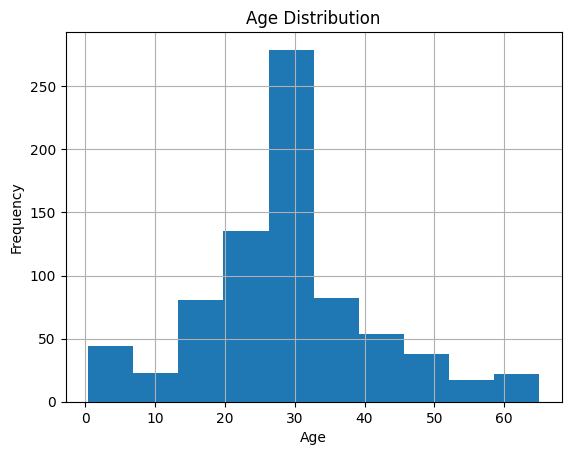

In [ ]:
# Univariate analysis
df['Age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

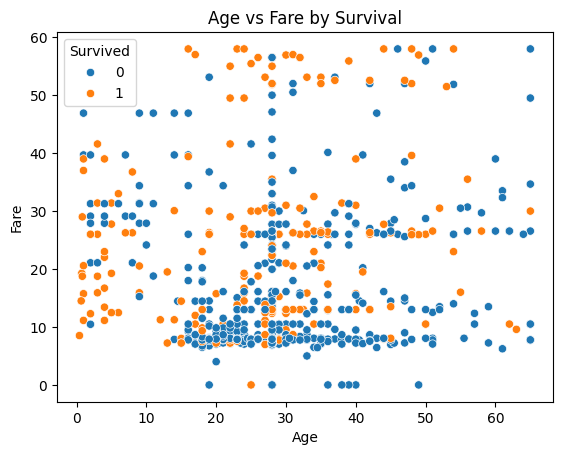

In [ ]:
# Bivariate analysis
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare by Survival')
plt.show()


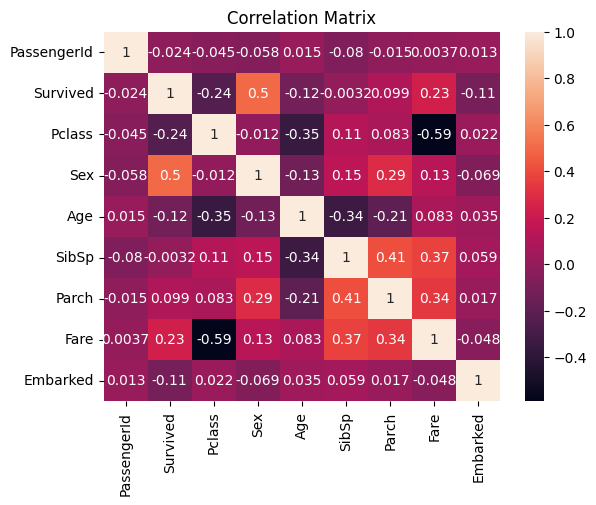

In [ ]:
# Multivariate analysis
numeric_columns = df.select_dtypes(include=['number'])
sns.heatmap(numeric_columns.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

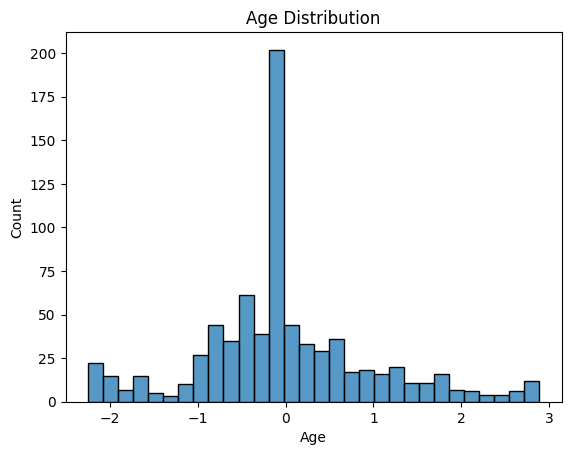

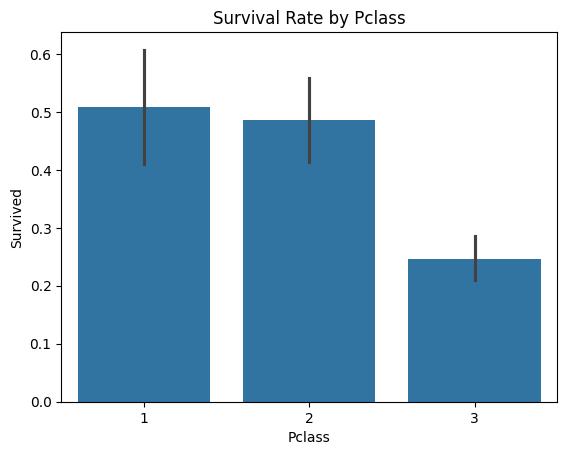

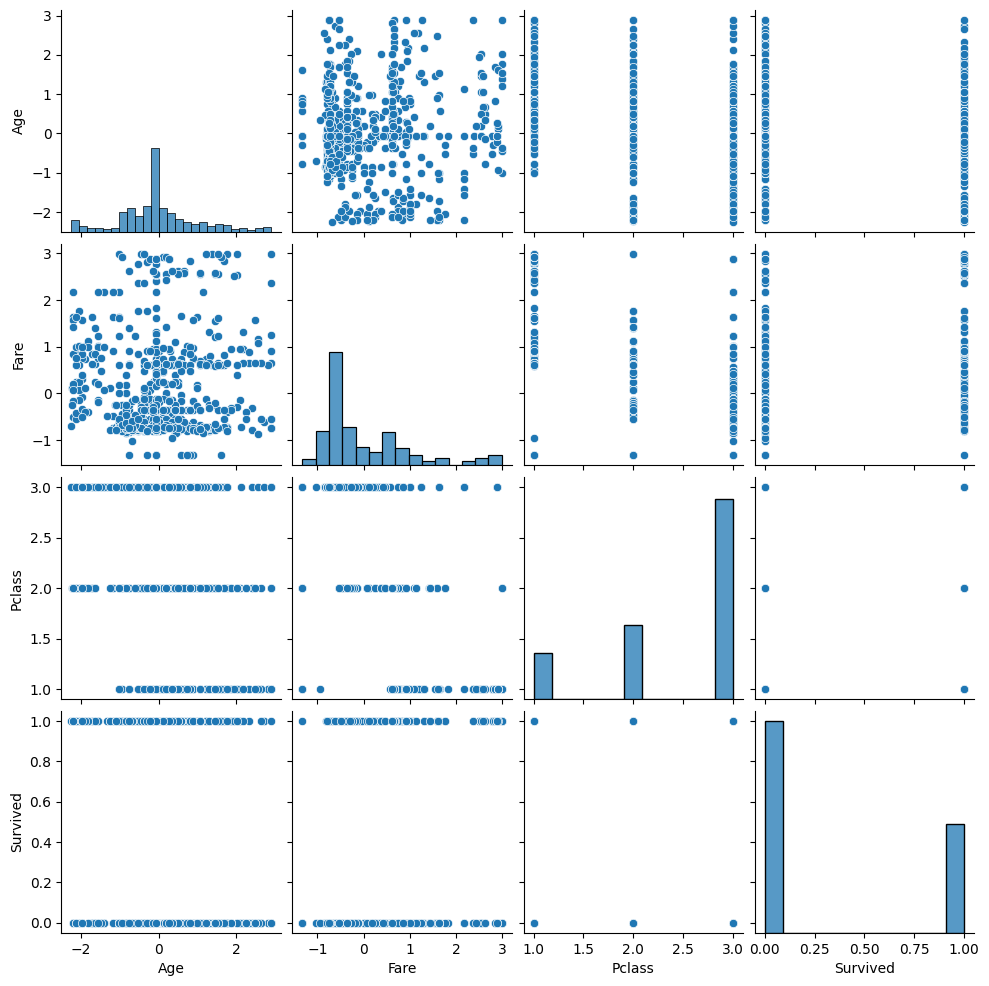

In [ ]:
## OTHER WAY ###
# Univariate Analysis
sns.histplot(df['Age'], bins=30)
plt.title('Age Distribution')
plt.show()

# Bivariate Analysis
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.show()

# Multivariate Analysis
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']])
plt.show()

# 6) Apply Feature Scaling Technique on Suitable Attribute

In [ ]:
# Scale the 'Age' and 'Fare' columns
from sklearn.preprocessing import StandardScaler

# Scaling numerical features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])



# 7) Split the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])  # Drop non-predictive columns
y = df['Survived']

# Split the dataset into training and testing sets with an 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Check the shape of the splits
print(f"Training set features shape: {X_train.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Test set features shape: {X_test.shape}")
print(f"Test set target shape: {y_test.shape}")


Training set features shape: (620, 7)
Training set target shape: (620,)
Test set features shape: (155, 7)
Test set target shape: (155,)


# **CONCLUSION:**

# We cleaned the Titanic dataset by handling missing values, removing outliers, and encoding categorical data. We then explored the data to understand relationships between features. Finally, we scaled the numeric data and split the dataset for machine learning, preparing it for accurate predictions.